Shape of dataset: (891, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Statistical Summary:


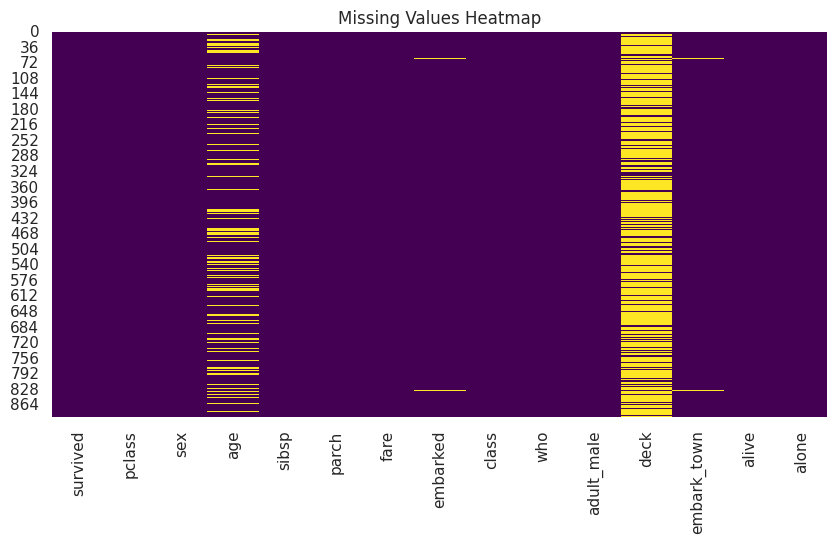

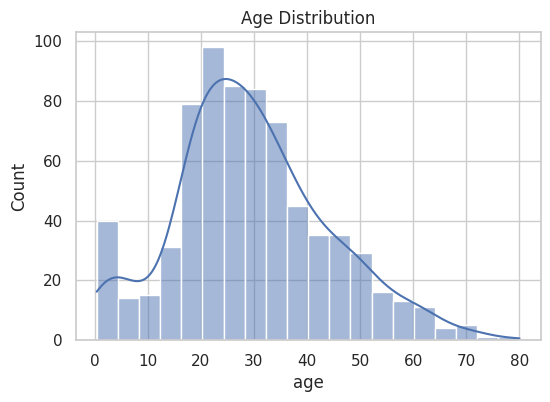

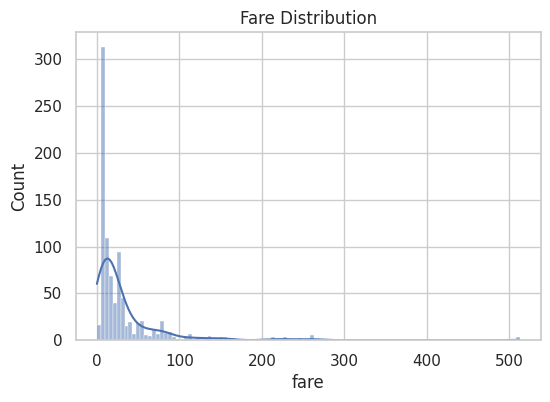

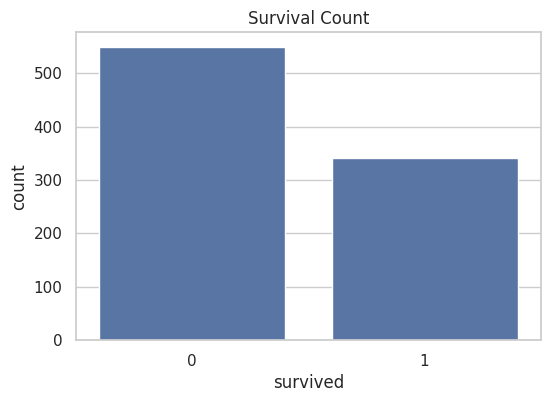

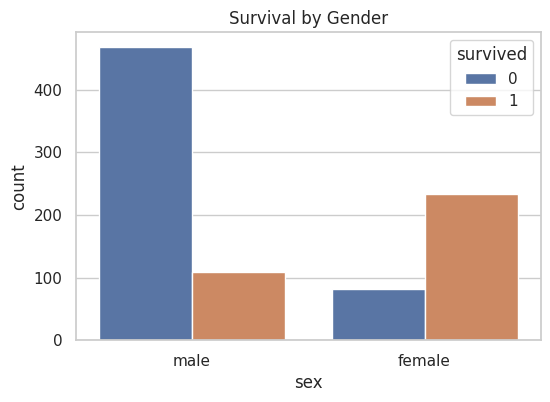

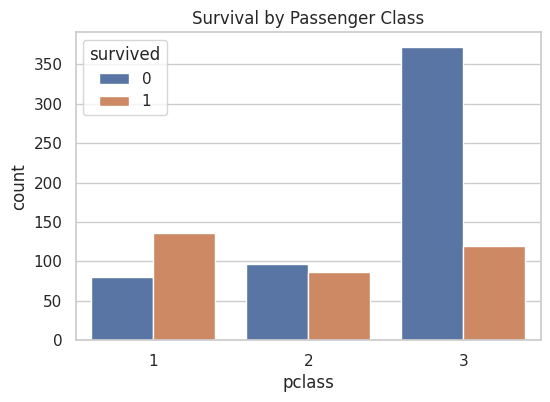

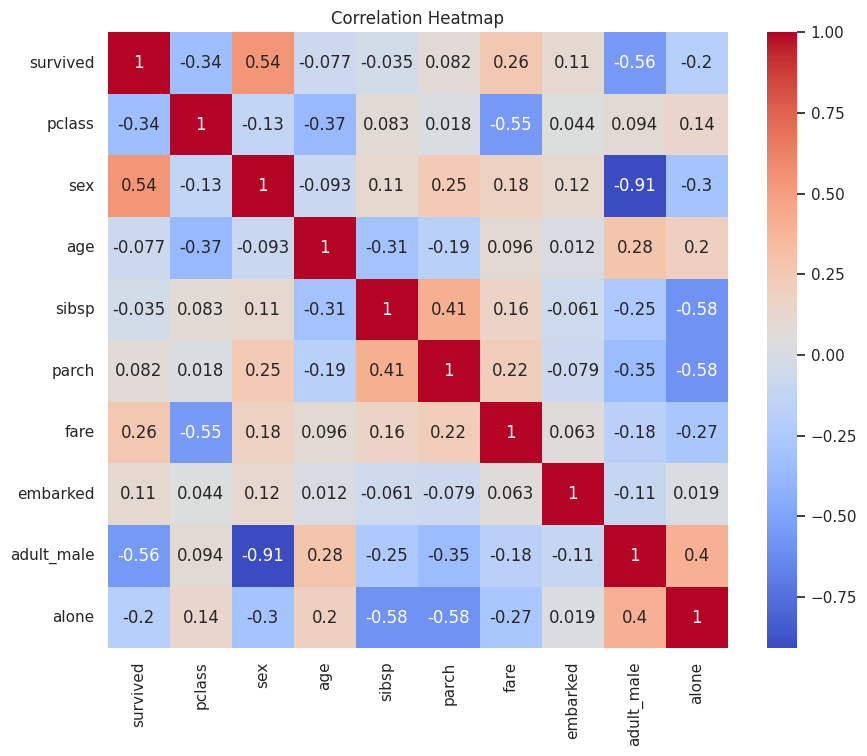

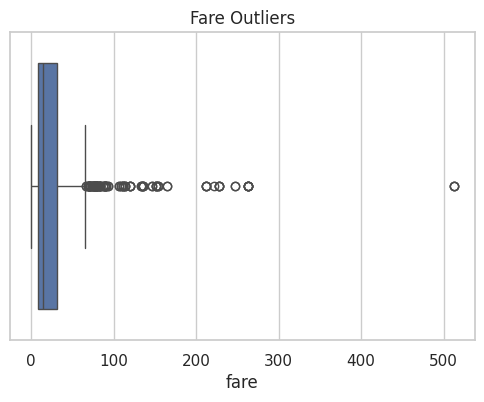

Key Insights:
1. Females had a significantly higher survival rate than males.
2. Passengers in 1st class survived more than those in 3rd class.
3. Age and Fare show skewed distributions with visible outliers.
4. Missing values are present in Age, Deck, and Embarked columns.


In [2]:
# Exploratory Data Analysis (EDA) for Structured Data
# Dataset: Titanic
# Platform: Google Colab

# ================================
# 1. Import Required Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ================================
# 2. Load Dataset
# ================================
# Using Seaborn's built-in Titanic dataset

df = sns.load_dataset('titanic')

# Display first 5 rows
df.head()

# ================================
# 3. Dataset Overview
# ================================
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

# ================================
# 4. Missing Value Analysis
# ================================
# Count missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

missing_df

# Visualize missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# ================================
# 5. Univariate Analysis (Distributions)
# ================================
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
plt.figure(figsize=(6,4))
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# ================================
# 6. Categorical Analysis
# ================================
# Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# ================================
# 7. Correlation Analysis
# ================================
# Encode categorical variables for correlation
encoded_df = df.copy()
encoded_df['sex'] = encoded_df['sex'].map({'male': 0, 'female': 1})
encoded_df['embarked'] = encoded_df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-numeric columns that were not encoded and would cause issues
# 'class' column contains strings like 'First', 'Second', 'Third'
# 'who', 'deck', 'embark_town', 'alive' are also non-numeric
columns_to_drop = ['class', 'who', 'deck', 'embark_town', 'alive']
encoded_df = encoded_df.drop(columns=columns_to_drop, errors='ignore')

# Correlation matrix
corr = encoded_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ================================
# 8. Outlier Detection
# ================================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'])
plt.title('Fare Outliers')
plt.show()

# ================================
# 9. Key Insights
# ================================
print("Key Insights:")
print("1. Females had a significantly higher survival rate than males.")
print("2. Passengers in 1st class survived more than those in 3rd class.")
print("3. Age and Fare show skewed distributions with visible outliers.")
print("4. Missing values are present in Age, Deck, and Embarked columns.")

# ================================
# End of Notebook
# ================================
